EDA : **Nuage de mot** pour connaitre les mots les plus communs pour saluer, dire au revoir, etc

**Un outil pour évaluer le modele** (LC, accuracy, etc.)

**Une inteface**

In [1]:
import numpy as np 
import string
from nltk.corpus import stopwords
import pandas as pd 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import TfidfTransformer,TfidfVectorizer
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('../data_fournis/dialogs.txt', delimiter="\t", header=None)

In [3]:
df

,0,1
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3720,that's a good question. maybe it's not old age.,are you right-handed?
3721,are you right-handed?,yes. all my life.
3722,yes. all my life.,you're wearing out your right hand. stop using...
3723,you're wearing out your right hand. stop using...,but i do all my writing with my right hand.


In [4]:
df = df.rename(columns={0: "Questions",1: "Answers"})
# ou df.columns=['Questions','Answers']

In [5]:
b = {'Questions':'Hi','Answers':'hello'}
c = {'Questions':'Hello','Answers':'hi'}
d= {'Questions':'how are you','Answers':"i'm fine. how about yourself?"}
e= {'Questions':'how are you doing','Answers':"i'm fine. how about yourself?"}
df = df.append([b,c,d,e],ignore_index=True)

In [6]:
def cleaner(x):
    return [a for a in (''.join([a for a in x if a not in string.punctuation])).lower().split()] # retire la ponctuation, mets tout en minuscules, split

**TF (Term-Frequency)** :  fréquence « brute » d'un terme est simplement le nombre d'occurrences de ce terme dans le document considéré

**Calcul de TF**
TF(t) = Nombre d'apparitions du terme t dans le document / Nombre total de termes dans le document

**IDF (Term Frequency-Inverse Document Frequency)** :  mesure de l'importance du terme dans l'ensemble du corpus. Dans le schéma TF-IDF, elle vise à donner un poids plus important aux termes les moins fréquents, considérés comme plus discriminants. Elle consiste à calculer le logarithme (en base 10 ou en base 21) de l'inverse de la proportion de documents du corpus qui contiennent le terme

**Calcul de IDF**
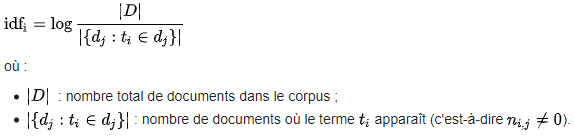

**Calcul de TF-IDF**

Finalement, le poids s'obtient en multipliant les deux mesures 


Compter le nombre d’occurrences des tokens présents dans le corpus pour chaque texte. Chaque texte est alors représenté par un vecteur d’occurrences.

RQ :

● Plus le vocabulaire du corpus est riche, plus la taille des vecteurs est grande, ce qui peut représenter un problème
pour les modèles d’apprentissage utilisées dans l’étape suivante.

● Le comptage d’occurrence des mots ne permet pas de rendre compte de leur agencement et donc du sens des
phrases.

In [20]:
df

,Questions,Answers
0,"hi, how are you doing?",i'm fine. how about yourself?
1,i'm fine. how about yourself?,i'm pretty good. thanks for asking.
2,i'm pretty good. thanks for asking.,no problem. so how have you been?
3,no problem. so how have you been?,i've been great. what about you?
4,i've been great. what about you?,i've been good. i'm in school right now.
...,...,...
3724,but i do all my writing with my right hand.,start typing instead. that way your left hand ...
3725,Hi,hello
3726,Hello,hi
3727,how are you,i'm fine. how about yourself?


In [37]:
X = df['Questions']

In [24]:
cv = CountVectorizer(analyzer=cleaner)
test = cv.fit_transform(df)
print(test)

  (0, 1)	1
  (1, 0)	1


In [38]:
# cv = CountVectorizer(analyzer=cleaner)
# test = cv.fit_transform(list("i'm fine. how about yourself?"))
# print(len("i'm fine. how about yourself?"))
# print(test.shape)
cv = CountVectorizer(analyzer=cleaner)
test = cv.fit_transform(X)

In [39]:
tt = TfidfTransformer()
test2 = tt.fit_transform(test)
print(test2)

  (0, 2382)	0.21306869485827026
  (0, 1007)	0.37107685643497273
  (0, 961)	0.6675922609847034
  (0, 608)	0.5115017242365298
  (0, 141)	0.331044192013877
  (1, 2389)	0.5722091201540129
  (1, 1031)	0.32647381834325134
  (1, 1007)	0.33541003260165075
  (1, 765)	0.586245770609081
  (1, 63)	0.3313722607915039
  (2, 2081)	0.48715432729733293
  (2, 1582)	0.4340985873218764
  (2, 1031)	0.3065331507030978
  (2, 880)	0.3331695594627166
  (2, 807)	0.3040990466487449
  (2, 159)	0.5261162607973736
  (3, 2382)	0.2096912468811788
  (3, 1890)	0.3436995258044231
  (3, 1588)	0.5141093214340624
  (3, 1365)	0.35838602138319187
  (3, 1007)	0.365194749826372
  (3, 934)	0.32224589199575626
  (3, 225)	0.45600620831966593
  (4, 2382)	0.22175770442560436
  (4, 2299)	0.3181933198943797
  :	:
  (3723, 1977)	0.33443841603929875
  (3723, 1890)	0.21649973514103563
  (3723, 1693)	0.2735743516001498
  (3723, 1433)	0.27265602856239507
  (3723, 1326)	0.28264843075336354
  (3723, 1077)	0.16566116737450334
  (3723, 915)	0

In [42]:
dfc = DecisionTreeClassifier()
# dfc.fit(test2,df['Answers'])

DecisionTreeClassifier()

In [47]:
question = ['how are you']
rep = cv.transform(question)
rep = tt.transform(rep)
print(dfc.predict(rep))
print(dfc.score(rep,df['Answers']))

["i'm fine. how about yourself?"]


ValueError: Found input variables with inconsistent numbers of samples: [3729, 1]

In [7]:
Pipe = Pipeline([
    ('bow',CountVectorizer(analyzer=cleaner)), # CountVectorizer : Convert a collection of text documents to a matrix of token counts.
    ('tfidf',TfidfTransformer()), #Transform a count matrix to a normalized tf or tf-idf representation.
    ('classifier',DecisionTreeClassifier())
])

In [8]:
Pipe.fit(df['Questions'],df['Answers'])

Pipeline(steps=[('bow',
                 CountVectorizer(analyzer=<function cleaner at 0x0000018D4A6C13A0>)),
                ('tfidf', TfidfTransformer()),
                ('classifier', DecisionTreeClassifier())])

In [9]:
Pipe.predict(['hi'])[0]

'hello'

In [10]:
Pipe.predict(['how are you'])[0]

"i'm fine. how about yourself?"

In [11]:
Pipe.predict(['how re you'])[0]

"i don't know. i think i'm average."

**Embedded word**

Consiste à construire des vecteurs de taille fixe qui prennent en compte le contexte dans lequel se trouvent les mots.
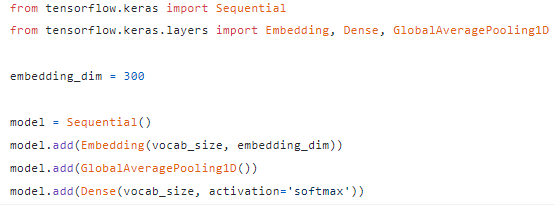

**6 key metrics to measure the performance of your chatbot**

1. Comprehension capabilities
2. User engagement
3. Speed
4. Functionality
5. Interoperability
6. Scalability